# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Pandas option to untruncate data and display it nicely 
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
# Combine the data into a single DataFrame

merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
print(merged_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        k403     Ramicane  Male          21          16          0           45.000000                 0
1        k403     Ramicane  Male          21          16          5           38.825898                 0
2        k403     Ramicane  Male          21          16         10           35.014271                 1
3        k403     Ramicane  Male          21          16         15           34.223992                 1
4        k403     Ramicane  Male          21          16         20           32.997729                 1
...       ...          ...   ...         ...         ...        ...                 ...               ...
1888     z969     Naftisol  Male           9          30         25           63.145652                 2
1889     z969     Naftisol  Male           9          30         30           65.841013                 3
1890     z969     Naftisol  Male           9  

In [20]:
# Checking the number of mice.
unique_mice_count = merged_df['Mouse ID'].nunique()
print(f"Number of unique mouse IDs: {unique_mice_count}")

Number of unique mouse IDs: 249


In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_timepoints = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
if not duplicate_timepoints.empty:
    print("\nMouse IDs with duplicate time points:")
    print(duplicate_timepoints[['Mouse ID', 'Timepoint']])


    duplicate_mouse_id = duplicate_timepoints.iloc[0]['Mouse ID']
    duplicate_data = merged_df[merged_df['Mouse ID'] == duplicate_mouse_id]
    print(f"\nData associated with Mouse ID '{duplicate_mouse_id}':")
    print(duplicate_data)


    cleaned_df = merged_df[merged_df['Mouse ID'] != duplicate_mouse_id]
    
    unique_mice_count_cleaned = cleaned_df['Mouse ID'].nunique()
    print(f"\nNumber of unique mouse IDs after cleaning: {unique_mice_count_cleaned}")

    print("\nCleaned DataFrame:")
    print(cleaned_df)

else:
    print("\nNo mouse IDs with duplicate time points.")
    cleaned_df = merged_df.copy()  # Use the original DataFrame if no duplicates are found
    unique_mice_count_cleaned = unique_mice_count_original


Mouse IDs with duplicate time points:
    Mouse ID  Timepoint
908     g989          0
909     g989          0
910     g989          5
911     g989          5
912     g989         10
913     g989         10
914     g989         15
915     g989         15
916     g989         20
917     g989         20

Data associated with Mouse ID 'g989':
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
908     g989     Propriva  Female          21          26          0           45.000000                 0
909     g989     Propriva  Female          21          26          0           45.000000                 0
910     g989     Propriva  Female          21          26          5           48.786801                 0
911     g989     Propriva  Female          21          26          5           47.570392                 0
912     g989     Propriva  Female          21          26         10           51.745156                 0
913     g989    

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

print(summary_stats_df)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

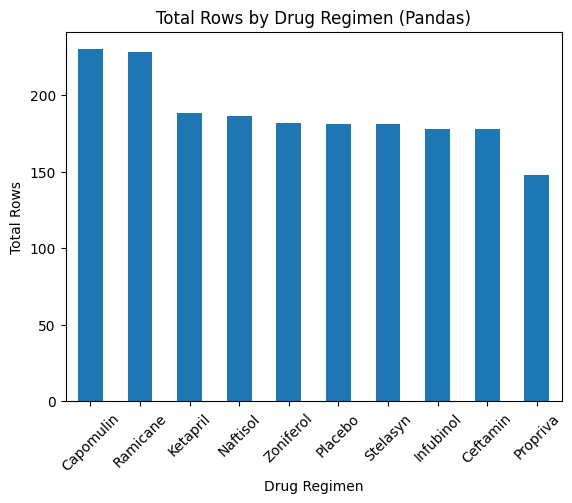

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()

ax1 = drug_regimen_counts.plot(kind='bar', title='Total Rows by Drug Regimen (Pandas)', rot=45)
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Total Rows')
plt.show()


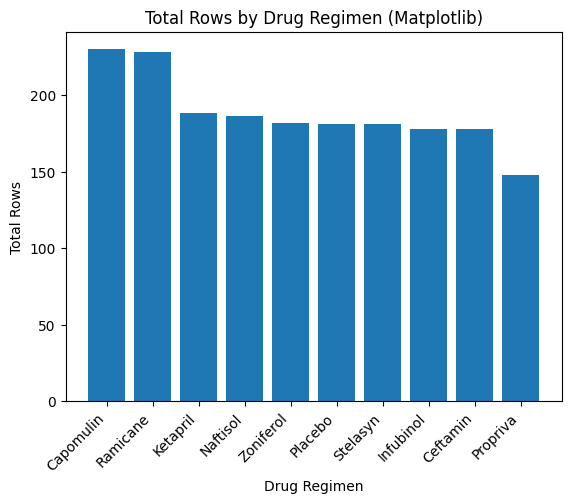

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_counts.index, drug_regimen_counts)
plt.title('Total Rows by Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows')
plt.xticks(rotation=45, ha='right')
plt.show()

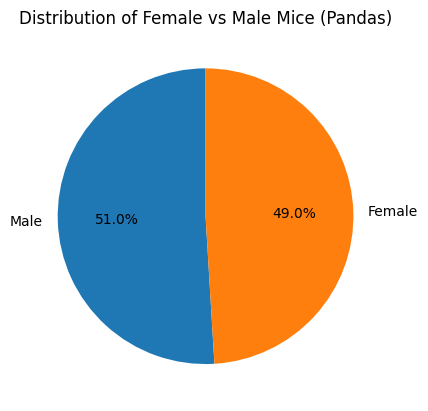

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_df['Sex'].value_counts()

ax1 = gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Distribution of Female vs Male Mice (Pandas)')
ax1.set_ylabel('')  # Remove the default 'Sex' label
plt.show()

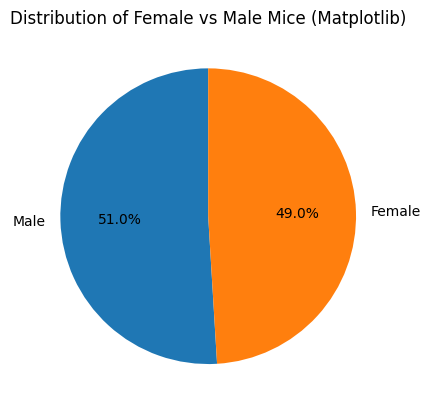

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice (Matplotlib)')
plt.show()

## Quartiles, Outliers and Boxplots


Potential outliers for Capomulin:
No potential outliers.

Potential outliers for Ramicane:
No potential outliers.

Potential outliers for Infubinol:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Potential outliers for Ceftamin:
No potential outliers.


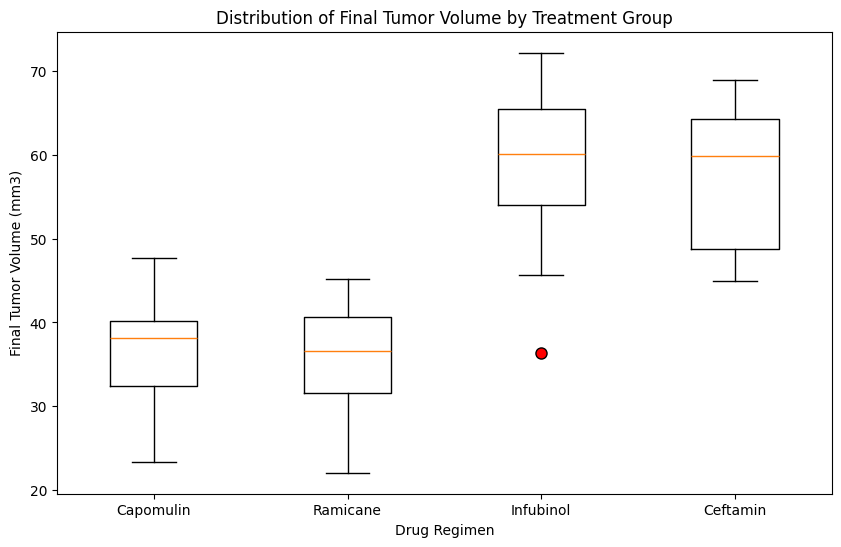

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint_df = cleaned_df.groupby(['Mouse ID']).agg({'Timepoint': 'max'}).reset_index()
merged_last_timepoint_df = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='inner')

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

for drug in treatments:
    final_tumor_volume = merged_last_timepoint_df.loc[merged_last_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)

for i, drug in enumerate(treatments):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])

    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    
    print(f"\nPotential outliers for {drug}:")
    if outliers.empty:
        print("No potential outliers.")
    else:
        print(outliers)


# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))


plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume by Treatment Group')


plt.show()


## Line and Scatter Plots

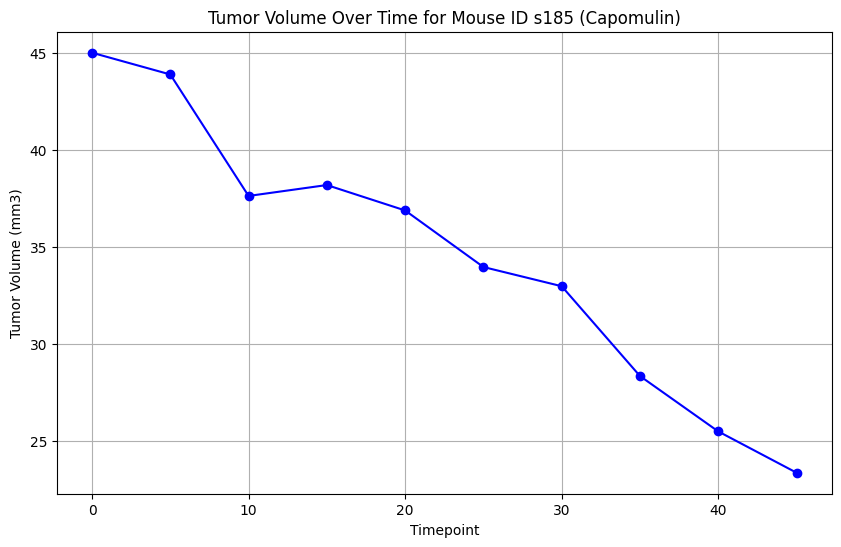

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_id = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin', 'Mouse ID'].iloc[0]
capomulin_mouse_data = cleaned_df.loc[cleaned_df['Mouse ID'] == capomulin_mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')


plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume Over Time for Mouse ID {capomulin_mouse_id} (Capomulin)')


plt.grid(True)
plt.show()

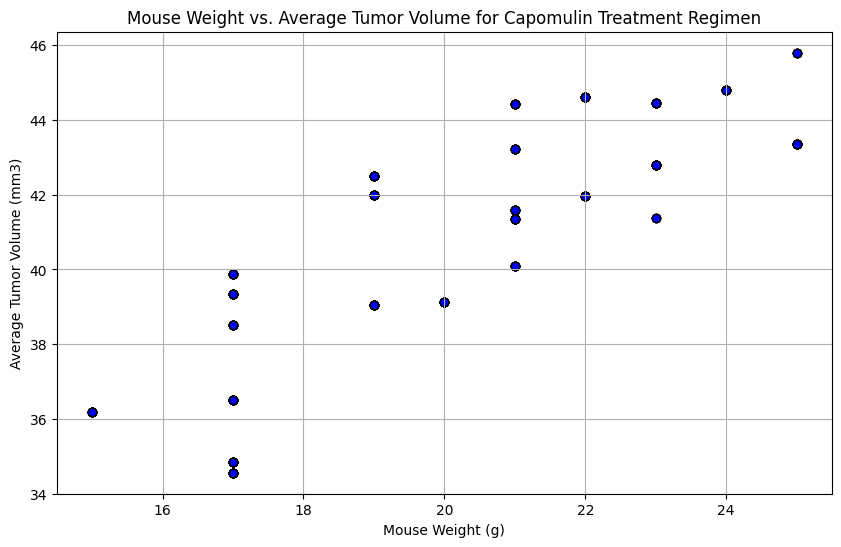

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']


average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


capomulin_avg_volume_df = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID', suffixes=('', '_avg'))


plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_volume_df['Weight (g)'], capomulin_avg_volume_df['Tumor Volume (mm3)_avg'], color='blue', edgecolors='black')


plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment Regimen')


plt.grid(True)
plt.show()

## Correlation and Regression

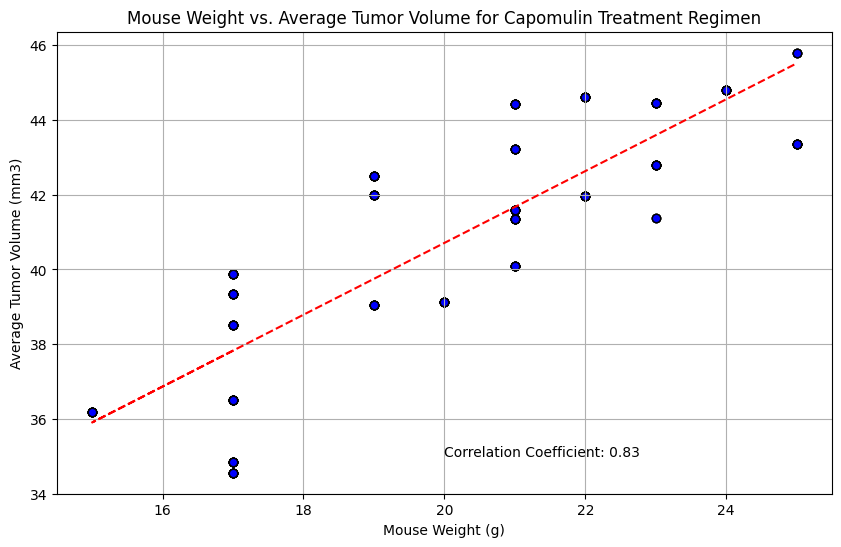

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress
correlation_coefficient = capomulin_avg_volume_df['Weight (g)'].corr(capomulin_avg_volume_df['Tumor Volume (mm3)_avg'])


slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_volume_df['Weight (g)'], capomulin_avg_volume_df['Tumor Volume (mm3)_avg'])


plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_volume_df['Weight (g)'], capomulin_avg_volume_df['Tumor Volume (mm3)_avg'], color='blue', edgecolors='black')


plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment Regimen')


plt.plot(capomulin_avg_volume_df['Weight (g)'], slope * capomulin_avg_volume_df['Weight (g)'] + intercept, color='red', linestyle='--')


plt.annotate(f'Correlation Coefficient: {correlation_coefficient:.2f}', xy=(20, 35), color='black')
plt.annotate(f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}', xy=(20, 30), color='black')

# Show the plot
plt.grid(True)
plt.show()